# Modeling Puff Amplitude and Frequency as a function of [IP<sub>3</sub>]

We sought to use a simple model of IP<sub>3</sub>R binding to IP<sub>3</sub> to determine the puff frequency and amplitude in a cluster of channels.

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)
import numpy as np
from scipy.misc import comb

First let's plot the fraction of bound IP<sub>3</sub>R as a function of IP<sub>3</sub> concentration.  The fraction of bound IP<sub>3</sub>R  equals $\frac{[IP_3]}{K_d + [IP_3]}$.  If we express the concentration of IP<sub>3</sub> in terms of the $K_d$, fraction becomes $\frac{[IP_3]}{1 + [IP_3]}$


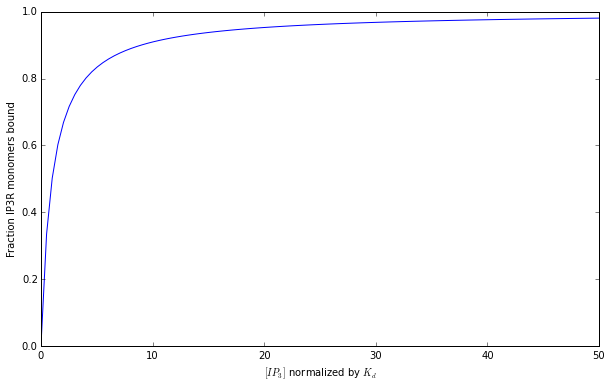

In [2]:
def get_frac_bound(concentration):
    return concentration/(1+concentration)
concentration=np.linspace(0,50,100)
frac_bound=get_frac_bound(concentration)
fig, ax = plt.subplots()
ax.plot(concentration,frac_bound)
ax.set_xlabel(r'$[IP_3]$ normalized by $K_d$')
ax.set_ylabel('Fraction IP3R monomers bound');

If an IP<sub>3</sub>R requires all four of its subunits to be bound before opening ([Alzayady et al, 2016](http://doi.org/10.1126/scisignal.aad6281)), the fraction of IP<sub>3</sub>Rs with totally bound subunits would be (fraction of bound IP<sub>3</sub>R subunits)<sup>4</sup>

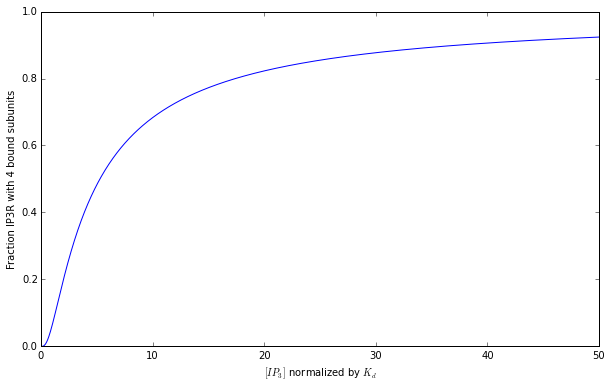

In [3]:
def get_frac_bound(concentration):
    return concentration/(1+concentration)
concentration=np.linspace(0,50,1000)
frac_bound=get_frac_bound(concentration)**4
fig, ax = plt.subplots()
ax.plot(concentration,frac_bound)
ax.set_xlabel(r'$[IP_3]$ normalized by $K_d$')
ax.set_ylabel('Fraction IP3R with 4 bound subunits');

Now let's make a cluster of 6 channels, each channel with four subunits.  The probability that the cluster will have N fully bound channels is given by the the binomial distribution:
 $$ P(X=N) =  {S \choose N} f^N (1-f)^{S-N} $$
 Where 
 - $f$ is the fraction of IP<sub>3</sub>Rs that have all 4 subunits bound.  This is a function of [IP<sub>3</sub>].
 - $S$ is the total number of channels in the cluster

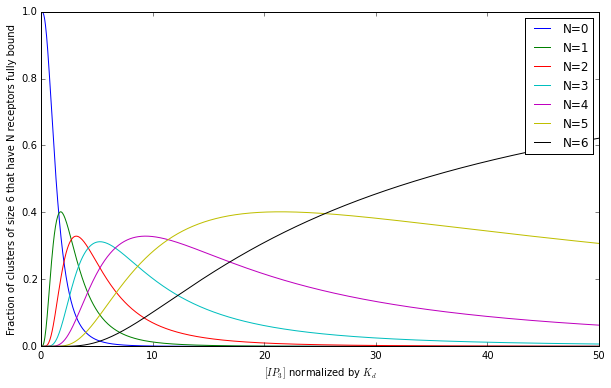

In [4]:
def get_prob_N_bound(N, cluster_size,concentration):
    frac_bound=get_frac_bound(concentration)**4
    C=comb(cluster_size, N, exact=True)
    return C * frac_bound**N * (1-frac_bound)**(cluster_size-N)

fig, ax = plt.subplots()
conc=np.linspace(0,50,1000)
cluster_size=6
for i in np.arange(0,cluster_size+1):
    ax.plot(conc, get_prob_N_bound(i,cluster_size, conc), label='N={}'.format(i))
plt.legend()
ax.set_xlabel(r'$[IP_3]$ normalized by $K_d$')
ax.set_ylabel(r'Fraction of clusters of size 6 that have N receptors fully bound');


Now that we know how a given concentration of IP<sub>3</sub> determines the number of bound channels in a cluster, we can translate this into expected puff frequency.  If 0 channels in a cluster of 6 are bound, the puff frequency is 0 Hz.  If 1 channel in a cluster of 6 is bound, the puff frequency will be some rate k.  If 2 channels are bound, the puff frequency will be 2k.  In general, if N channels are bound, the puff frequency will be N times k.  The puff frequecy of puffs in which N channels participate is the probability that N channels are bound times N times k.  Let's plot this.

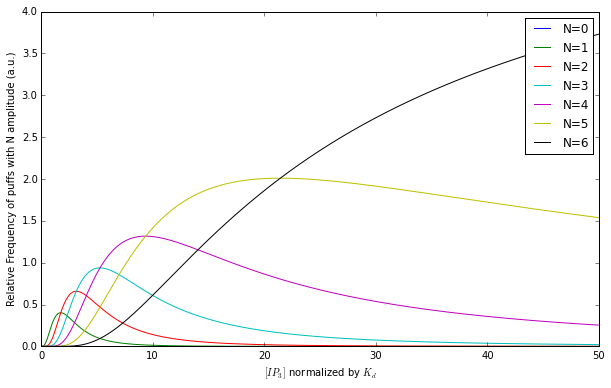

In [5]:
fig, ax = plt.subplots()
conc=np.linspace(0,50,1000)
cluster_size=6
for i in np.arange(0,cluster_size+1):
    ax.plot(conc, i*get_prob_N_bound(i,cluster_size, conc), label='N={}'.format(i))
ax.set_xlabel(r'$[IP_3]$ normalized by $K_d$')
ax.set_ylabel(r'Relative Frequency of puffs with N amplitude (a.u.)')
plt.legend();


The total number of puffs at a cluster is the sum of all the puffs of different amplitudes. Let's plot this.

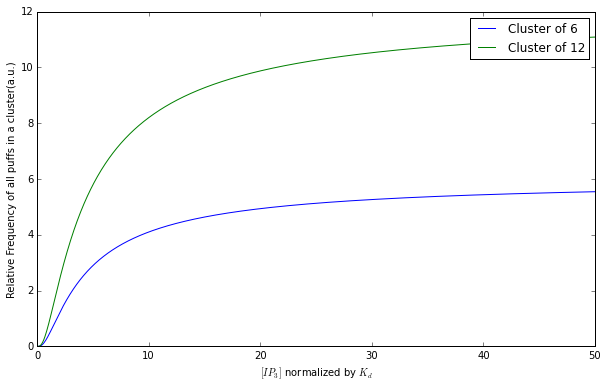

In [6]:
conc=np.linspace(0,50,1000)

cluster_size=6
puff_freq_6=[]
for i in np.arange(0,cluster_size+1):
    puff_freq_6.append(i*get_prob_N_bound(i,cluster_size, conc))
puff_freq_6=np.array(puff_freq_6)

cluster_size=12
puff_freq_12=[]
for i in np.arange(0,cluster_size+1):
    puff_freq_12.append(i*get_prob_N_bound(i,cluster_size, conc))
puff_freq_12=np.array(puff_freq_12)

fig, ax = plt.subplots()
ax.plot(conc, np.sum(puff_freq_6,0), label='Cluster of 6')
ax.plot(conc, np.sum(puff_freq_12,0), label='Cluster of 12')
ax.set_xlabel(r'$[IP_3]$ normalized by $K_d$')
ax.set_ylabel(r'Relative Frequency of all puffs in a cluster(a.u.)')
plt.legend();


Let's plot the average amplitude of all puffs from a site as a function of [IP<sub>3</sub>].

c:\python27\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
c:\python27\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


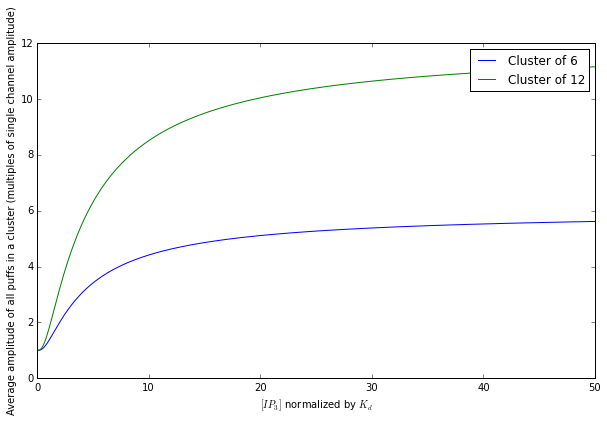

In [7]:
fig, ax = plt.subplots()
ax.plot(conc, np.dot(np.arange(6+1),puff_freq_6)/np.sum(puff_freq_6,0), label='Cluster of 6')
ax.plot(conc, np.dot(np.arange(12+1),puff_freq_12)/np.sum(puff_freq_12,0), label='Cluster of 12')
ax.set_xlabel(r'$[IP_3]$ normalized by $K_d$')
ax.set_ylabel(r'Average amplitude of all puffs in a cluster (multiples of single channel amplitude)')
plt.legend();

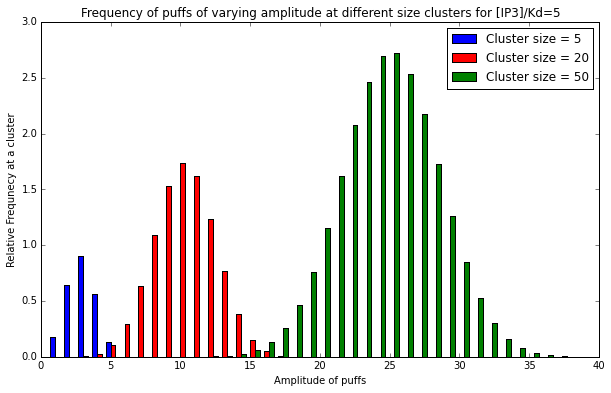

In [8]:
conc=5
cluster_size=5
r_freq=[]
for i in np.arange(0,cluster_size+1):
    r_freq.append(i*get_prob_N_bound(i,cluster_size, conc))
fig, ax = plt.subplots()
width=.35
ax.bar(np.arange(cluster_size+1)-width, r_freq, width, color='b', label='Cluster size = {}'.format(cluster_size));

conc=5
cluster_size=20
r_freq=[]
for i in np.arange(0,cluster_size+1):
    r_freq.append(i*get_prob_N_bound(i,cluster_size, conc))
ax.bar(np.arange(cluster_size+1), r_freq, width, color='r', label='Cluster size = {}'.format(cluster_size));

conc=5
cluster_size=50
r_freq=[]
for i in np.arange(0,cluster_size+1):
    r_freq.append(i*get_prob_N_bound(i,cluster_size, conc))
ax.bar(np.arange(cluster_size+1)+width, r_freq, width, color='g', label='Cluster size = {}'.format(cluster_size));

plt.legend();
plt.xlim([0,40])
ax.set_xlabel(r'Amplitude of puffs')
ax.set_ylabel(r'Relative Frequnecy at a cluster');
ax.set_title('Frequency of puffs of varying amplitude at different size clusters for [IP3]/Kd=5');

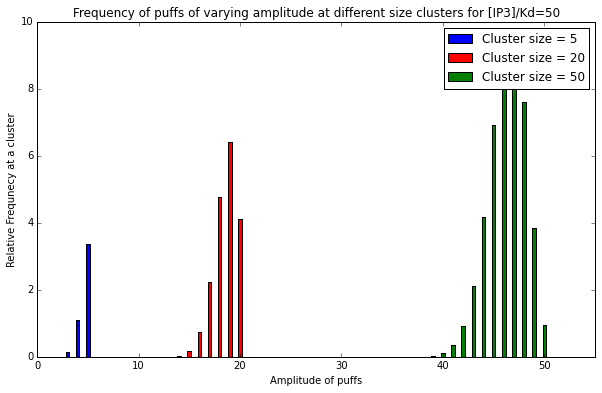

In [13]:
conc=50
cluster_size=5
r_freq=[]
for i in np.arange(0,cluster_size+1):
    r_freq.append(i*get_prob_N_bound(i,cluster_size, conc))
fig, ax = plt.subplots()
width=.35
ax.bar(np.arange(cluster_size+1)-width/2, r_freq, width, color='b', label='Cluster size = {}'.format(cluster_size));

cluster_size=20
r_freq=[]
for i in np.arange(0,cluster_size+1):
    r_freq.append(i*get_prob_N_bound(i,cluster_size, conc))
ax.bar(np.arange(cluster_size+1)-width/2, r_freq, width, color='r', label='Cluster size = {}'.format(cluster_size));

cluster_size=50
r_freq=[]
for i in np.arange(0,cluster_size+1):
    r_freq.append(i*get_prob_N_bound(i,cluster_size, conc))
ax.bar(np.arange(cluster_size+1)-width/2, r_freq, width, color='g', label='Cluster size = {}'.format(cluster_size));

plt.legend();
plt.xlim([0,55])
ax.set_xlabel(r'Amplitude of puffs')
ax.set_ylabel(r'Relative Frequnecy at a cluster');
ax.set_title('Frequency of puffs of varying amplitude at different size clusters for [IP3]/Kd=50');